In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

pd.set_option('display.max_columns', None)
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# Which 2 demographics have proven to be the most popular with the telco brand?

In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Demographics: Gender, SeniorCitizen, Partner, Dependents

In [5]:
Churn_no=df[df['Churn']== 'No']
Churn_yes=df[df['Churn']== 'Yes']

In [6]:
demo_no=Churn_no.groupby(['gender','SeniorCitizen', 'Partner','Dependents' ])['customerID'].count().reset_index()

demo_no

,gender,SeniorCitizen,Partner,Dependents,customerID
0,Female,0,No,No,909
1,Female,0,No,Yes,110
2,Female,0,Yes,No,482
3,Female,0,Yes,Yes,720
4,Female,1,No,No,159
5,Female,1,No,Yes,2
6,Female,1,Yes,No,136
7,Female,1,Yes,Yes,31
8,Male,0,No,No,963
9,Male,0,No,Yes,168


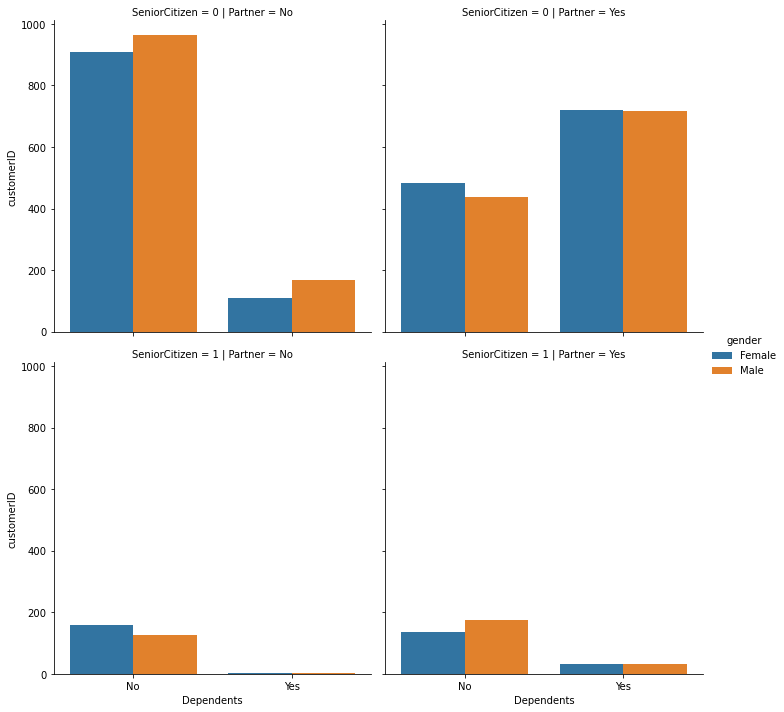

In [7]:
sns.catplot(data=demo_no, x='Dependents', y='customerID', row='SeniorCitizen', col='Partner', hue='gender', kind='bar')

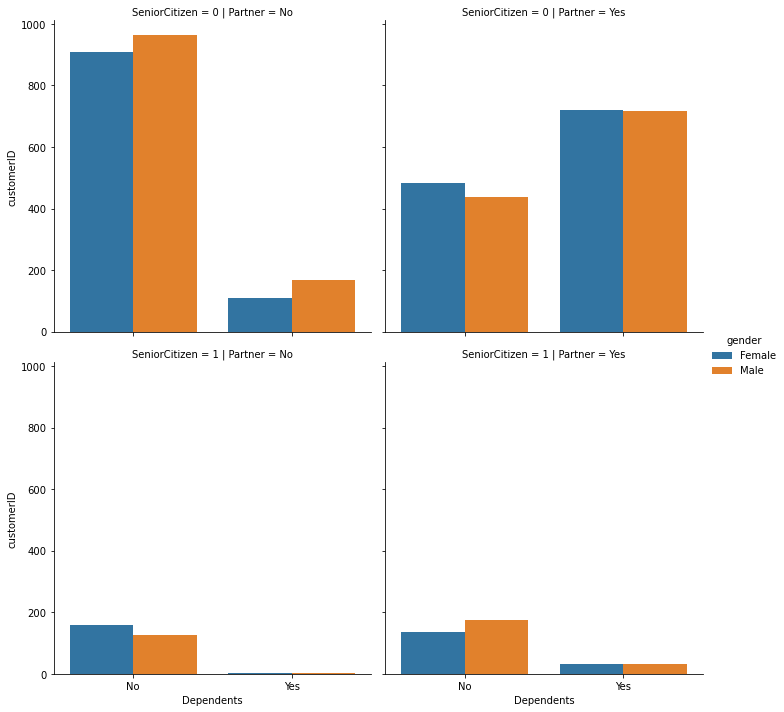

In [8]:
demo_yes=Churn_no.groupby(['gender','SeniorCitizen', 'Partner','Dependents' ])['customerID'].count().reset_index()
sns.catplot(data=demo_yes, x='Dependents', y='customerID', row='SeniorCitizen', col='Partner', hue='gender', kind='bar')


# If the marketing team wanted to increase customer retention, to whom should they target their advertisements to?

Market to young people(not seniors or partners), men and women, without dependents. they are the majority churning

#   2. Services:
a. Which 3 services are contributing to a higher monthly charge and resulting to customers churning? (Use visualizations in explaining your analysis)
b. If the telco was to offer Phone as a standalone service, which type of contract would encourage customer retention?

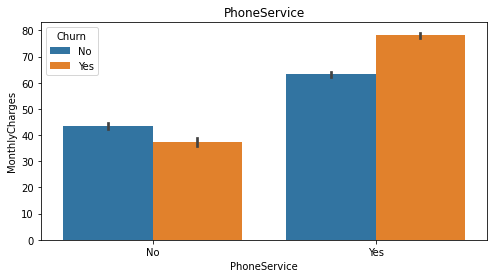

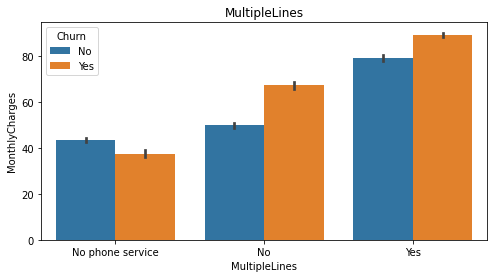

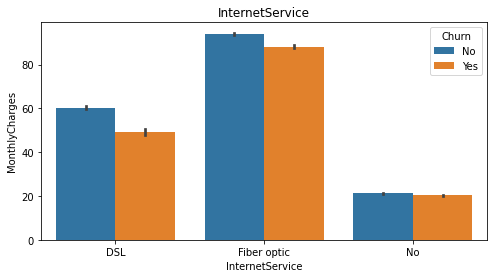

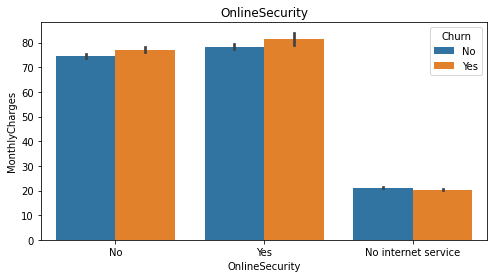

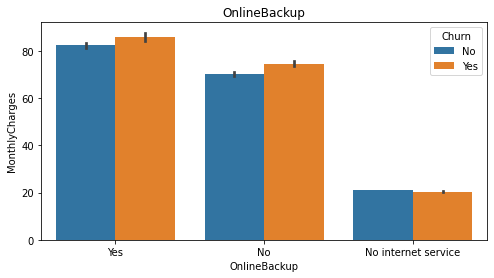

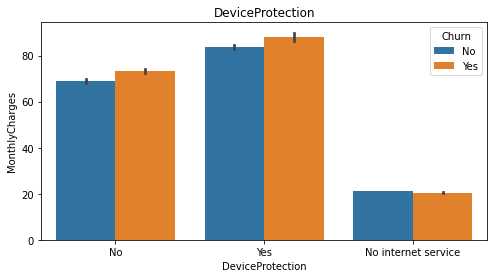

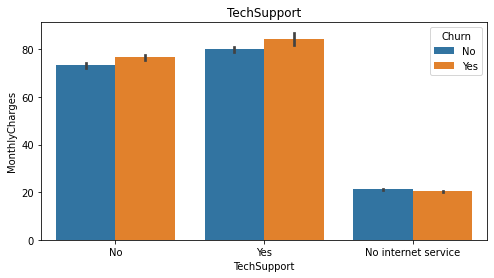

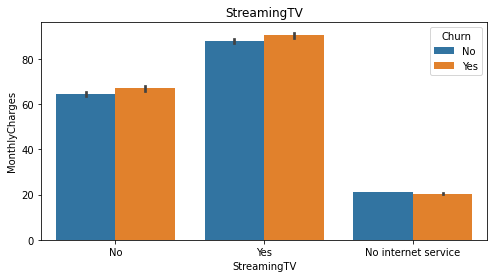

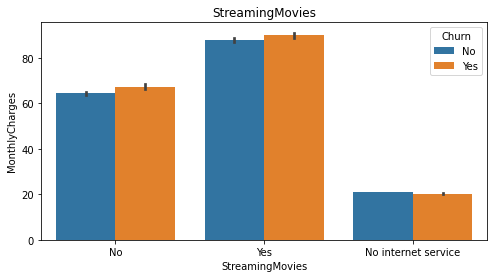

In [9]:
services= ['PhoneService','MultipleLines','InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies',]


for i in services:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=i, y='MonthlyCharges', data=df, hue='Churn')
    plt.title(i)
    plt.show()

All services seem to be contributiong to higher monthly charge and customer chunning except those from connected fiber optic and DSL Internet


b.

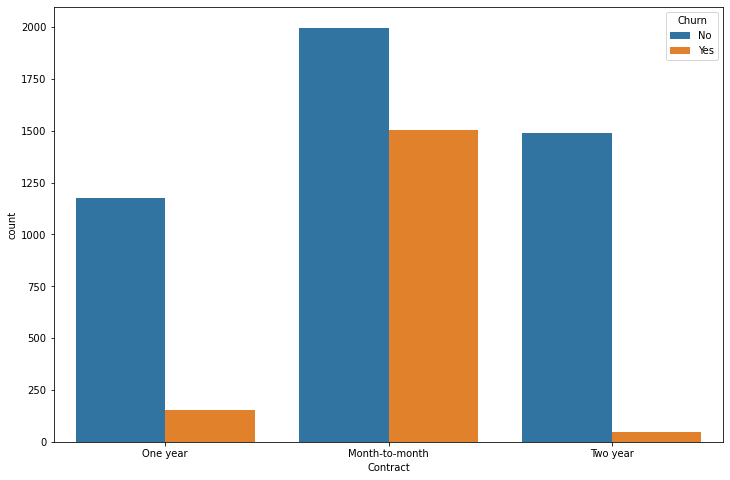

In [10]:
Pservice=df[df['PhoneService']=='Yes']

plt.figure(figsize=(12,8))

sns.countplot(data=Pservice, x='Contract', hue='Churn')

Very few people with two year contract churn. advocating for 2 years contract is the best

# Payment:
(Use visualizations in explaining your analysis)
a. If the company was to streamline all its services into 3 bouquet packages, what monthly prices will be appropriate for the following packages to keep customers from churning:
i. Basic
ii. Plus
iii. Premium
b. Should the company strictly go paperless for their monthly billings as a technique of keeping their customers and why?

In [17]:
import seaborn as sns, numpy as np
sns.set_theme(); np.random.seed(0)
x = np.random.randn(100)
ax = sns.distplot(x)

plt.figure(figsize=(12,8))


sns.distplot(data=df, x="MonthlyCharges",col='Churn' )

AttributeError: module 'seaborn' has no attribute 'set_theme'

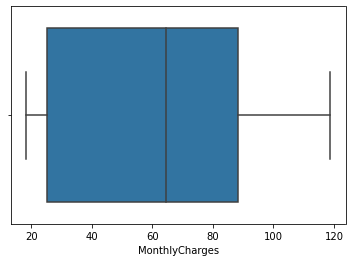

In [21]:
Churn_no=df[df['Churn']== 'No']
sns.boxplot(Churn_no['MonthlyCharges'])

In [22]:
Churn_no.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5174.000000,5174.000000,5174.000000
mean,0.128721,37.569965,61.265124
std,0.334923,24.113777,31.092648
min,0.000000,0.000000,18.250000
25%,0.000000,15.000000,25.100000
50%,0.000000,38.000000,64.425000
75%,0.000000,61.000000,88.400000
max,1.000000,72.000000,118.750000


basic- 25

plus-64

premium-88

b. Should the company strictly go paperless for their monthly billings as a technique of keeping their customers and why?

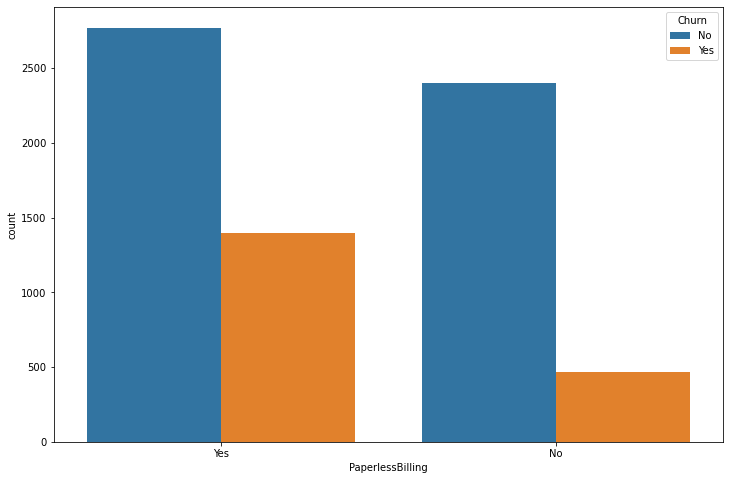

In [25]:
plt.figure(figsize=(12,8))

sns.countplot(data=df, x='PaperlessBilling', hue='Churn')

a significant number of customers are churning when we go paperless. its wise for the company not to go fully paperless Billing